In [9]:
import arviz as az
import numpy as np
from scipy import stats

from mc_lab.independent_metropolis_hastings import IndependentMetropolisHastingsSampler


def target_log_pdf(x):
    return stats.norm.logpdf(x, loc=0, scale=1)


def proposal_sampler():
    return np.random.normal(0, 1.2)


def proposal_log_pdf(x):
    return stats.norm.logpdf(x, loc=0, scale=1.2)


sampler = IndependentMetropolisHastingsSampler(
    target_log_pdf, proposal_sampler, proposal_log_pdf
)
idata = sampler.sample(n_samples=1000, n_chains=2)
print(az.summary(idata))

Sampling (Chain 1/2): 100%|██████████| 2000/2000 [00:00<00:00, 15560.60samples/s]


    mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
x -0.045  0.989  -2.013    1.805      0.023    0.017    1847.0    1793.0   

   r_hat  
x    1.0  


In [ ]:
print(f"Number of chains: {idata.posterior.dims['chain']}")
print(f"Number of draws per chain: {idata.posterior.dims['draw']}")
print(f"Shape of posterior data: {idata.posterior['x'].shape}")
print(f"Chain dimension: {idata.posterior.coords['chain'].values}")
print("Actual data structure:")
print(idata.posterior["x"].values)

Number of chains: 2
Number of draws per chain: 1000
Shape of posterior data: (2, 1000)
Chain dimension: [0 1]
Actual data structure:
[[-0.38663919 -0.38663919 -0.38663919 ... -1.58427912 -0.06542856
   0.72199306]
 [ 0.89774796 -1.13539299 -0.84324021 ... -1.6236339  -3.63469952
   1.30187608]]


/var/folders/fy/zx0sb02j5rv66mcpx65ldmvc0000gn/T/ipykernel_82749/3166955702.py:1: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  print(f"Number of chains: {idata.posterior.dims['chain']}")
/var/folders/fy/zx0sb02j5rv66mcpx65ldmvc0000gn/T/ipykernel_82749/3166955702.py:2: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  print(f"Number of draws per chain: {idata.posterior.dims['draw']}")


In [4]:
print("Acceptance rates:")
acceptance_rates = sampler.get_acceptance_rates(idata)
for key, rate in acceptance_rates.items():
    print(f"  {key}: {rate:.3f}")

print("\nChain statistics:")
print(f"Chain 0 mean: {idata.posterior['x'].sel(chain=0).mean().values:.3f}")
print(f"Chain 1 mean: {idata.posterior['x'].sel(chain=1).mean().values:.3f}")
print(f"Chain 0 std: {idata.posterior['x'].sel(chain=0).std().values:.3f}")
print(f"Chain 1 std: {idata.posterior['x'].sel(chain=1).std().values:.3f}")

Acceptance rates:
  overall: 0.884
  chain_0: 0.879
  chain_1: 0.889

Chain statistics:
Chain 0 mean: -0.003
Chain 1 mean: -0.028
Chain 0 std: 1.038
Chain 1 std: 1.031


In [5]:
# Test the updated sampler with fixed progress bars
print("Testing updated sampler with progress bars for all chains:")
sampler_new = IndependentMetropolisHastingsSampler(
    target_log_pdf, proposal_sampler, proposal_log_pdf
)
idata_new = sampler_new.sample(n_samples=500, n_chains=3, burn_in=200)

Testing updated sampler with progress bars for all chains:


Sampling (Chain 1/3): 100%|██████████| 700/700 [00:00<00:00, 15672.36samples/s]


In [6]:
# Test with the final fix - should show progress for each chain
print("Testing final fix - each chain should show its own progress bar:")
sampler_final = IndependentMetropolisHastingsSampler(
    target_log_pdf, proposal_sampler, proposal_log_pdf
)
idata_final = sampler_final.sample(n_samples=400, n_chains=2, burn_in=100)

print(f"Result: {idata_final.posterior.dims}")
print(f"Acceptance rates: {sampler_final.get_acceptance_rates(idata_final)}")

Testing final fix - each chain should show its own progress bar:


Sampling (Chain 1/2): 100%|██████████| 500/500 [00:00<00:00, 14912.87samples/s]

Result: FrozenMappingWarningOnValuesAccess({'chain': 2, 'draw': 400})
Acceptance rates: {'overall': 0.8975, 'chain_0': 0.8875, 'chain_1': 0.9075}


<Axes: title={'center': 'x'}, xlabel='Total number of draws', ylabel='ESS'>

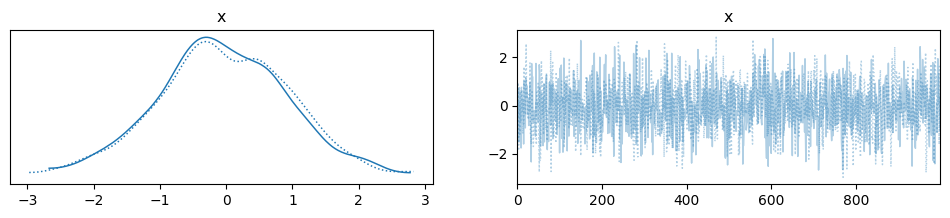

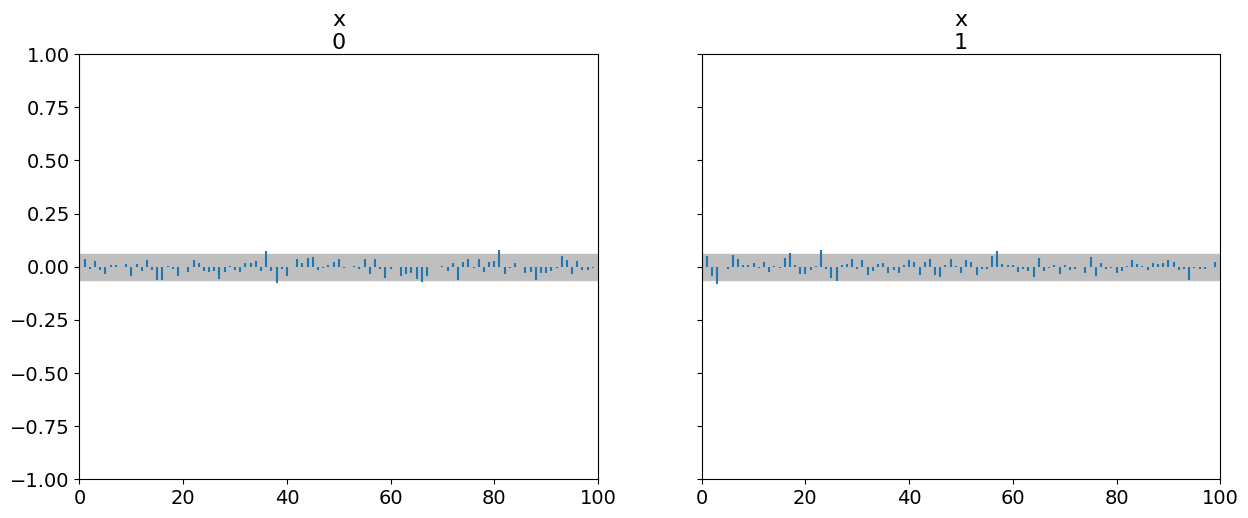

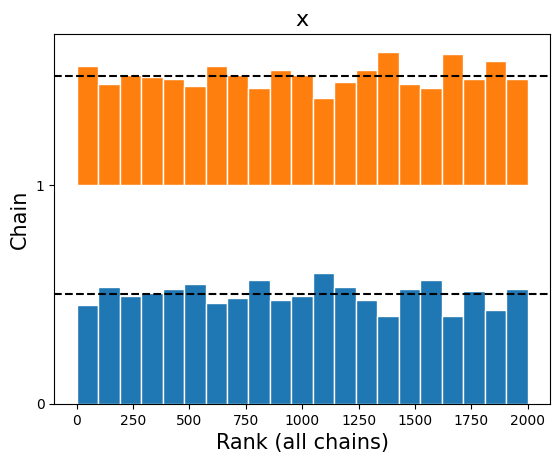

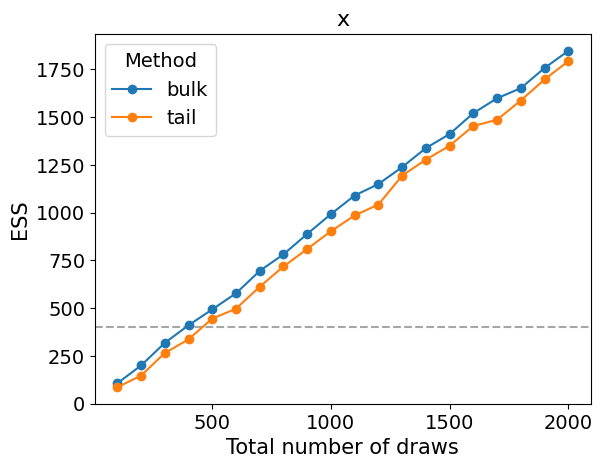

In [11]:
# ArviZ diagnostic plots

# Trace plot with ArviZ
az.plot_trace(idata, var_names=["x"], combined=False)

# Autocorrelation
az.plot_autocorr(idata, var_names=["x"], combined=False)

# Rank plot
az.plot_rank(idata, var_names=["x"])


# ESS evolution plot
az.plot_ess(idata, var_names=["x"], kind="evolution")